In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.analysis.archive

/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


updated file list


In [219]:
import glob

In [676]:
pkls = glob.glob('/data/readout/pkl/2015-11-*.pkl')
pkls.sort()

In [677]:
df = kid_readout.analysis.archive.build_simple_archive(pkls)

In [678]:
df.shape

(2816, 91)

In [679]:
df = kid_readout.analysis.archive.add_total_mmw_attenuator_turns(df)

(0, 10000.0)

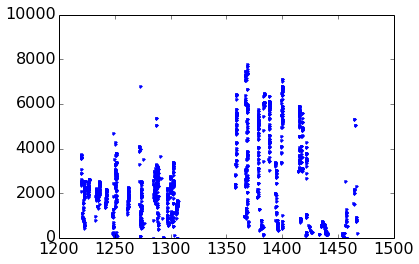

In [680]:
plot(df.f_0,np.abs(df.Q),'.')
ylim(0,1e4)

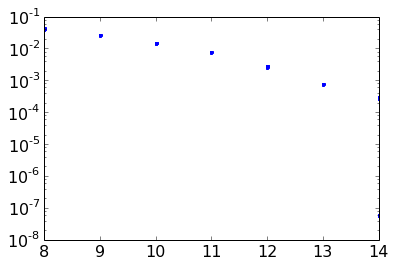

In [681]:
semilogy(df.mmw_atten_total_turns,df.zbd_voltage,'.')

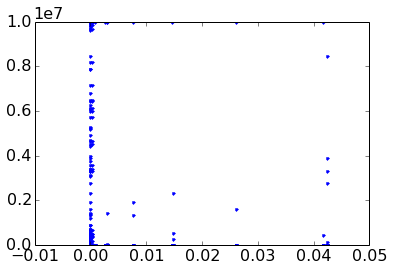

In [682]:
plot(df.zbd_voltage,df.Q,'.')

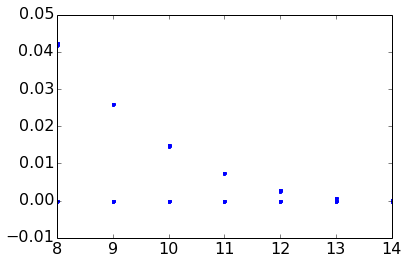

In [683]:
plot(df.mmw_atten_total_turns,df.zbd_voltage,'.')

In [684]:
def add_zbd(x):
    x['zbd_voltage'] = x[x.timestream_modulation_duty_cycle==0.5]['zbd_voltage'].iloc[0]
    return x
df = df.groupby(df.mmw_atten_total_turns).apply(add_zbd)

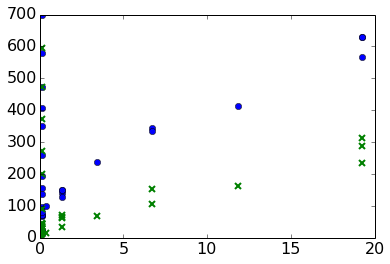

In [685]:
dd = df[(df.resonator_id==2) & (df.timestream_modulation_duty_cycle==0)]
fmax = df[(df.resonator_id==2) & (df.timestream_modulation_duty_cycle==1)].f_0.max()
plot(dd.zbd_voltage*1e6/2200,1e6*(1-dd.f_0/fmax),'o')
dd = df[(df.resonator_id==26) & (df.timestream_modulation_duty_cycle==0)]
fmax = df[(df.resonator_id==26) & (df.timestream_modulation_duty_cycle==1)].f_0.max()
plot(dd.zbd_voltage*1e6/2200,1e6*(1-dd.f_0/fmax),'x',mew=2)

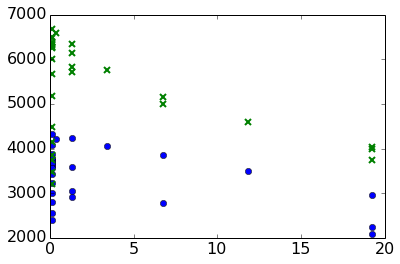

In [686]:
dd = df[(df.resonator_id==2) & (df.timestream_modulation_duty_cycle==0)]
plot(dd.zbd_voltage*1e6/2200.,dd.Q_i,'o')
dd = df[(df.resonator_id==26) & (df.timestream_modulation_duty_cycle==0)]
plot(dd.zbd_voltage*1e6/2200.,dd.Q_i,'x',mew=2)

(0, 10000)

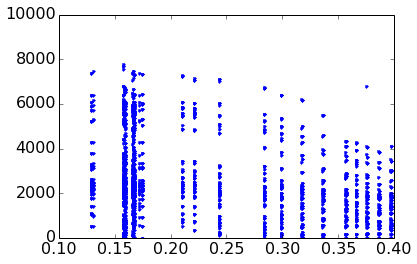

In [687]:
plot(df.sweep_primary_package_temperature,df.Q,'.')
ylim(0,10000)

In [688]:
np.abs(df.Q-7000).argmin()

1209

In [689]:
df.resonator_id.iloc[1209]

25

In [690]:
df.Q.iloc[25]

5103.3551511459054

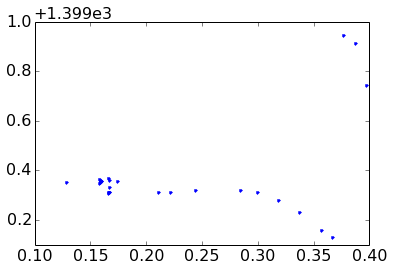

In [691]:
dd = df[(df.resonator_id==25) & (df.timestream_modulation_duty_cycle==1)]
plot(dd.sweep_primary_package_temperature,dd.f_0,'.')

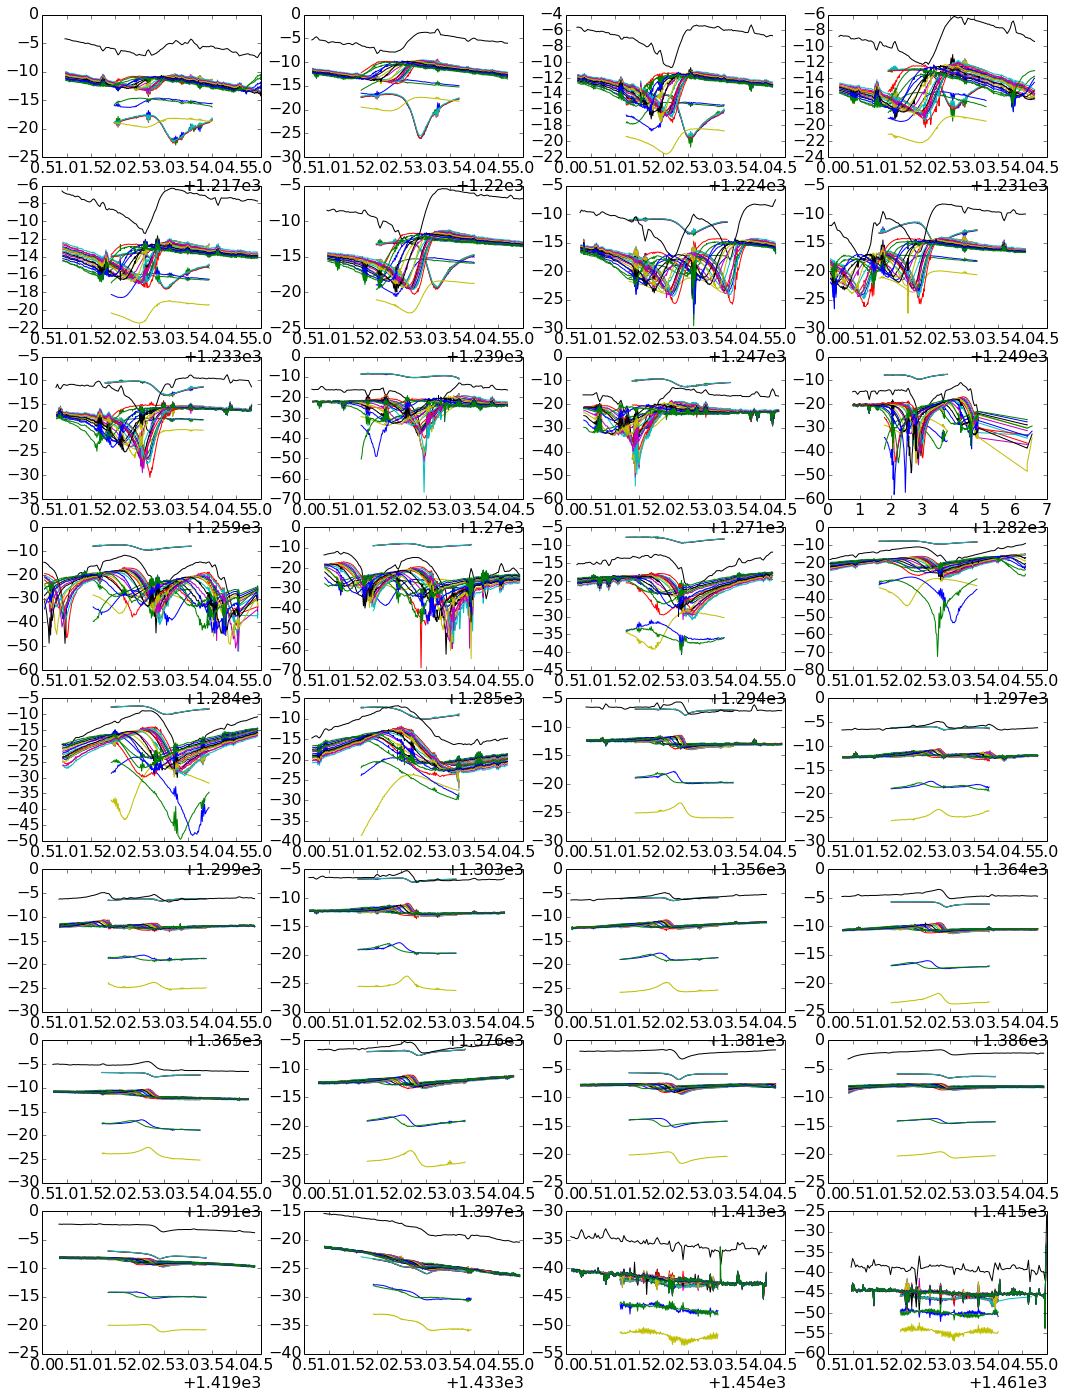

In [692]:
fig,axs = subplots(8,4,figsize=(18,24))
for k in range(32):
    dd = df[(df.resonator_id==k) & (df.timestream_modulation_duty_cycle==0)]
    ax = axs.flatten()[k]
    for kl,row in dd.iterrows():
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21)))
        #ax.plot(row.sweep_freqs_MHz[::-1],np.abs(row.sweep_s21)/row.A_mag)        

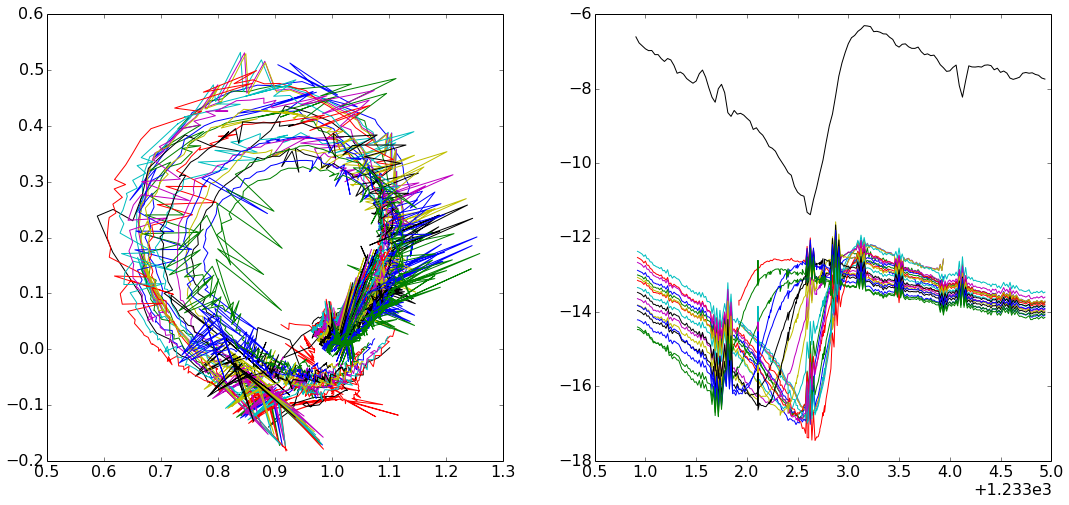

In [693]:
dd = df[(df.resonator_id==4) & (df.timestream_modulation_duty_cycle==0)&(df.atten==15)]# & (df.a.isnull())]
fig,(ax1,ax2) = subplots(1,2,figsize=(18,8))
for k,row in dd.iterrows():
    ax1.plot(row.sweep_normalized_s21.real,row.sweep_normalized_s21.imag)
    ax2.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_s21)))

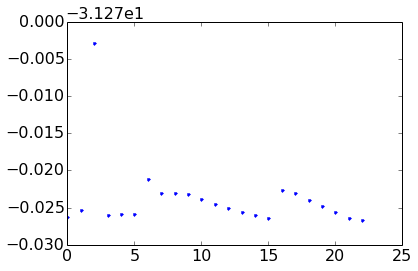

In [694]:
plot(dd.delay,'.')

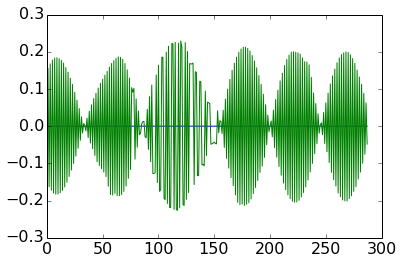

In [695]:
plot(row.sweep_errors)
plot(row.sweep_s21)

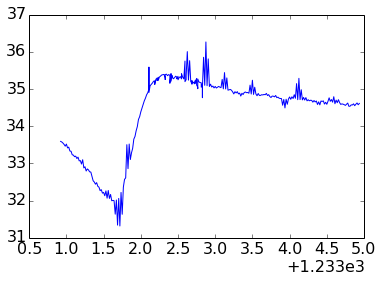

In [696]:
plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_normalized_s21*(50+(row.sweep_freqs_MHz-row.sweep_freqs_MHz.min())))))
#plot(row.sweep_model_freqs_MHz,20*np.log10(np.abs(row.sweep_model_normalized_s21)))


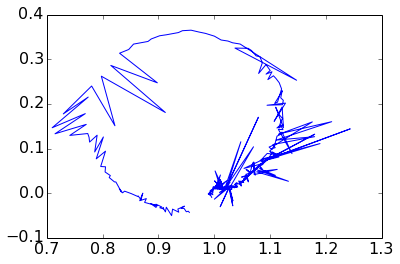

In [697]:
plot(row.sweep_normalized_s21.real,row.sweep_normalized_s21.imag)

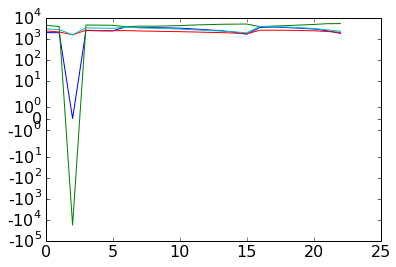

In [698]:
plot(dd.Q_e_real)
plot(dd.Q_e_imag)
plot(dd.Q)
plot(dd.Q_i)
yscale('symlog')

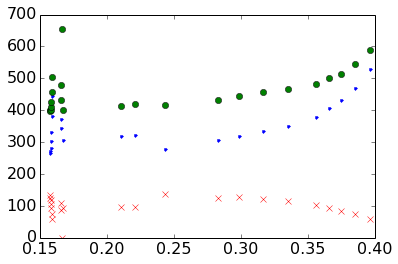

In [699]:
plot(dd.sweep_primary_package_temperature,1e6/dd.Q_i,'.')
plot(dd.sweep_primary_package_temperature,1e6/dd.Q,'o')
plot(dd.sweep_primary_package_temperature,np.real(1e6/(dd.Q_e_real+1j*dd.Q_e_imag)),'x')


#ylim(0,4e3)

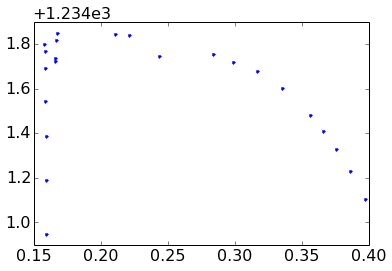

In [700]:
plot(dd.sweep_primary_package_temperature,dd.f_0,'.')

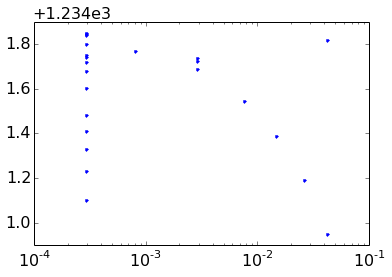

In [701]:
semilogx(dd.zbd_voltage,dd.f_0,'.')

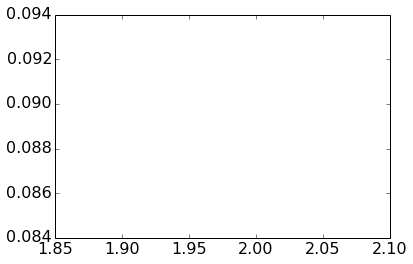

In [506]:
plot(dd.a)

In [261]:
from kid_readout.analysis import dataframe

In [ ]:
#dataframe.add_

In [192]:
snms = kid_readout.analysis.archive.load_noise_pkl('/data/readout/pkl/2015-11-05_133428_mmwtonestep.pkl')

In [193]:
len(snms)

96

In [252]:
snm0 = snms[2+32*0]

In [253]:
snm0.power_dbm -= (30-13)

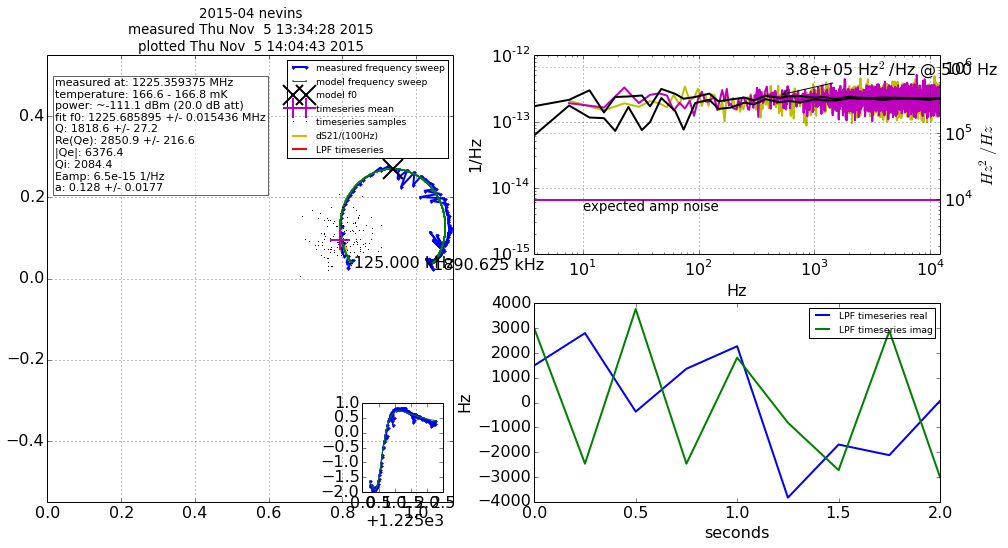

In [254]:
blah = snm0.plot()

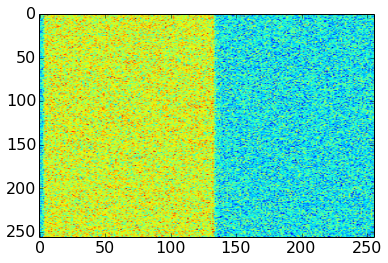

In [211]:
imshow(np.real(snm0.fractional_fluctuation_timeseries.reshape((-1,256))),aspect='auto')

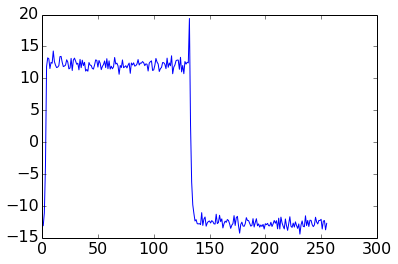

In [213]:
plot(1e6*np.real(snm0.fractional_fluctuation_timeseries.reshape((-1,256))).mean(0))

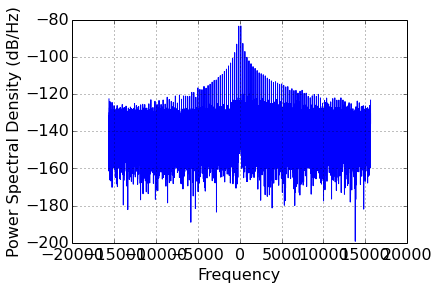

In [205]:
blah = psd(snm0.fractional_fluctuation_timeseries,Fs=512e6/2**14,NFFT=2**17)
#xscale('symlog')

In [16]:
df.columns

Index([u'A_mag', u'A_mag_err', u'A_phase', u'A_phase_err', u'Q', u'Q_e_imag', u'Q_e_imag_err', u'Q_e_real', u'Q_e_real_err', u'Q_err', u'Q_i', u'Q_i_err', u'a', u'a_err', u'adc_sampling_freq_MHz', u'atten', u'chip_name', u'dac_chain_gain', u'deglitch_threshold', u'deglitch_window', u'delay', u'delay_err', u'delay_estimate_microseconds', u'end_temp', u'experiment_description', u'experiment_info', u'f_0', u'f_0_err', u'f_phi', u'f_phi_err', u'freqs_coarse', u'is_dark', u'low_pass_normalized_timeseries', u'low_pass_projected_timeseries', u'low_pass_timestep', u'mmw_atten_turns', u'nfft', u'noise_measurement_freq_MHz', u'normalized_ds21_df_at_meas_freq', u'normalized_model_s21_at_meas_freq', u'normalized_model_s21_at_resonance', u'normalized_timeseries_mean', u'optical_state', u'pca_S', u'pca_angles', u'pca_eigvals', u'pca_eigvects', u'pca_freq', u'pca_piq', u'phi', u'phi_err', u'pii_coarse', u'power_dbm', u'prr_coarse', u'resonator_index', u'start_temp', u'sweep_epoch', u'sweep_errors', u

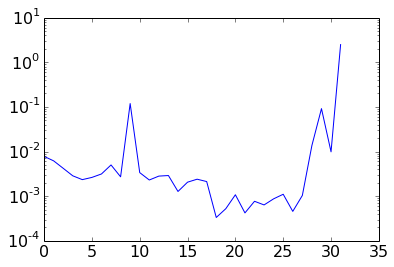

In [25]:
semilogy(df.A_mag_err/df.A_mag)

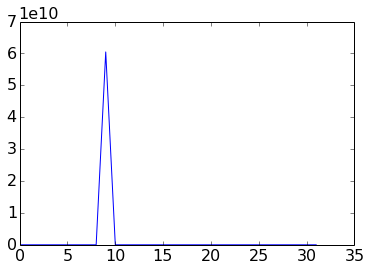

In [17]:
plot(df.)